# CNN models: regularized

Trying out different regularization techniques to reduce overfitting. I'll introduce:
 - image augmentation to increase variety of dataset
 - L2 regularization
 - batch normalization
 - dropout layers

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2

from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load images for modeling

Use `ImageDataGenerator` class from Keras with `flow_from_directory` method to feed images into the model.

In [3]:
# Image folder for training
train_dir = 'input_images/train'

In [4]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

## CNN2: Image Augmentation

Same architecture as before, but with image aug (like with the NN models I was trying).

In [21]:
# Get data from directories and scale
imgaug_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1,
                                    horizontal_flip=True,
                                    rotation_range=20, 
                                    brightness_range=[0.5, 1.5], 
                                    zoom_range=.2)

imaug_train_gen = imgaug_datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
imaug_val_gen = imgaug_datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [22]:
# Instatiate model
cnn_model_2 = models.Sequential()

# Add model layers - Using architecture from Canvas 'CNN from Scratch - Lab' to start
cnn_model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_2.add(MaxPooling2D((2, 2)))
cnn_model_2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))
cnn_model_2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))
cnn_model_2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))
# Flatten
cnn_model_2.add(Flatten())
# Final Dense layers
cnn_model_2.add(Dense(512, activation='relu'))
cnn_model_2.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [23]:
# Train the model
cnn_history_2 = cnn_model_2.fit(imaug_train_gen,
                                epochs=15, 
                                validation_data=imaug_val_gen)

Epoch 1/15
39/39 [==============================] - 192s 5s/step - loss: 0.6182 - acc: 0.6770 - recall: 0.7233 - precision: 0.6652 - val_loss: 0.4340 - val_acc: 0.8222 - val_recall: 0.9118 - val_precision: 0.7750
Epoch 2/15
39/39 [==============================] - 187s 5s/step - loss: 0.4547 - acc: 0.8173 - recall: 0.7654 - precision: 0.8569 - val_loss: 0.2886 - val_acc: 0.8889 - val_recall: 0.9265 - val_precision: 0.8630
Epoch 3/15
39/39 [==============================] - 203s 5s/step - loss: 0.3856 - acc: 0.8401 - recall: 0.7977 - precision: 0.8741 - val_loss: 0.2925 - val_acc: 0.8889 - val_recall: 0.9559 - val_precision: 0.8442
Epoch 4/15
39/39 [==============================] - 190s 5s/step - loss: 0.3616 - acc: 0.8564 - recall: 0.8317 - precision: 0.8771 - val_loss: 0.2236 - val_acc: 0.9185 - val_recall: 0.9559 - val_precision: 0.8904
Epoch 5/15
39/39 [==============================] - 178s 5s/step - loss: 0.3385 - acc: 0.8646 - recall: 0.8188 - precision: 0.9036 - val_loss: 0.189

In [24]:
cnn_model_2.save('models/cnn_model_2.h5')

Training eval:
39/39 [==============================] - 149s 4s/step - loss: 0.2848 - acc: 0.8793 - recall: 0.7816 - precision: 0.9738

Validation eval:
5/5 [==============================] - 8s 2s/step - loss: 0.1796 - acc: 0.9407 - recall: 0.9118 - precision: 0.9688


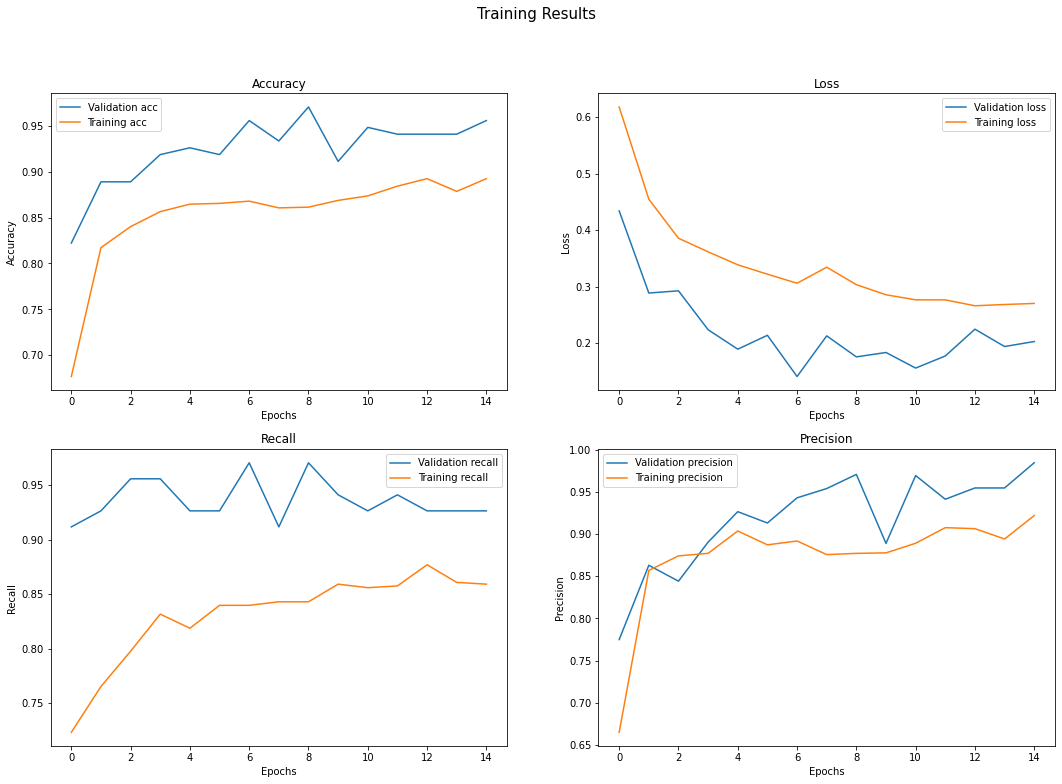

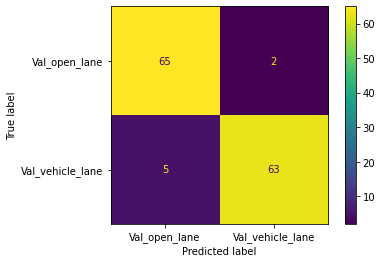

In [25]:
visualize_results(cnn_history_2, cnn_model_2, imaug_train_gen, imaug_val_gen)

In [26]:
dump(cnn_history_2.history, open('models/cnn_history_2.pkl', 'wb'))

## CNN3: Batch Normalization

Adding BatchNormalization layers to increase speed and hopefully regularize a little. Also going to take away one of the convolutional layers.

In [27]:
# Get data from directories and scale
batchnorm_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1,
                                    horizontal_flip=True,
                                    rotation_range=20, 
                                    brightness_range=[0.5, 1.5], 
                                    zoom_range=.2)

batchnorm_train_gen = batchnorm_datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
batchnorm_val_gen = batchnorm_datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [28]:
# Instatiate model
cnn_model_3 = models.Sequential()

# Add model layers - Using architecture from Canvas 'CNN from Scratch - Lab' to start
cnn_model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(MaxPooling2D((2, 2)))
cnn_model_3.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(MaxPooling2D((2, 2)))
cnn_model_3.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_3.add(Flatten())
# Final Dense layers
cnn_model_3.add(Dense(512, activation='relu'))
cnn_model_3.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_3.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [29]:
# Train the model
cnn_history_3 = cnn_model_3.fit(batchnorm_train_gen,
                                epochs=15, 
                                validation_data=batchnorm_val_gen)

Epoch 1/15
39/39 [==============================] - 200s 5s/step - loss: 19.9507 - acc: 0.6843 - recall: 0.6521 - precision: 0.7009 - val_loss: 73.0699 - val_acc: 0.4963 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/15
39/39 [==============================] - 205s 5s/step - loss: 2.0444 - acc: 0.7357 - recall: 0.6958 - precision: 0.7597 - val_loss: 10.2850 - val_acc: 0.5407 - val_recall: 0.2941 - val_precision: 0.5882
Epoch 3/15
39/39 [==============================] - 243s 6s/step - loss: 0.7489 - acc: 0.7675 - recall: 0.6926 - precision: 0.8184 - val_loss: 16.4203 - val_acc: 0.5630 - val_recall: 0.7059 - val_precision: 0.5517
Epoch 4/15
39/39 [==============================] - 223s 6s/step - loss: 0.6030 - acc: 0.7863 - recall: 0.7443 - precision: 0.8156 - val_loss: 124.9483 - val_acc: 0.4963 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/15
39/39 [==============================] - 212s 5s/step - loss: 0.4906 - acc: 0.7879 - recall: 0.7298 - precision: 0.

In [30]:
cnn_model_3.save('models/cnn_model_3.h5')

Training eval:
39/39 [==============================] - 148s 4s/step - loss: 0.4881 - acc: 0.8181 - recall: 0.6683 - precision: 0.9582

Validation eval:
5/5 [==============================] - 9s 2s/step - loss: 0.7442 - acc: 0.8593 - recall: 0.8088 - precision: 0.9016


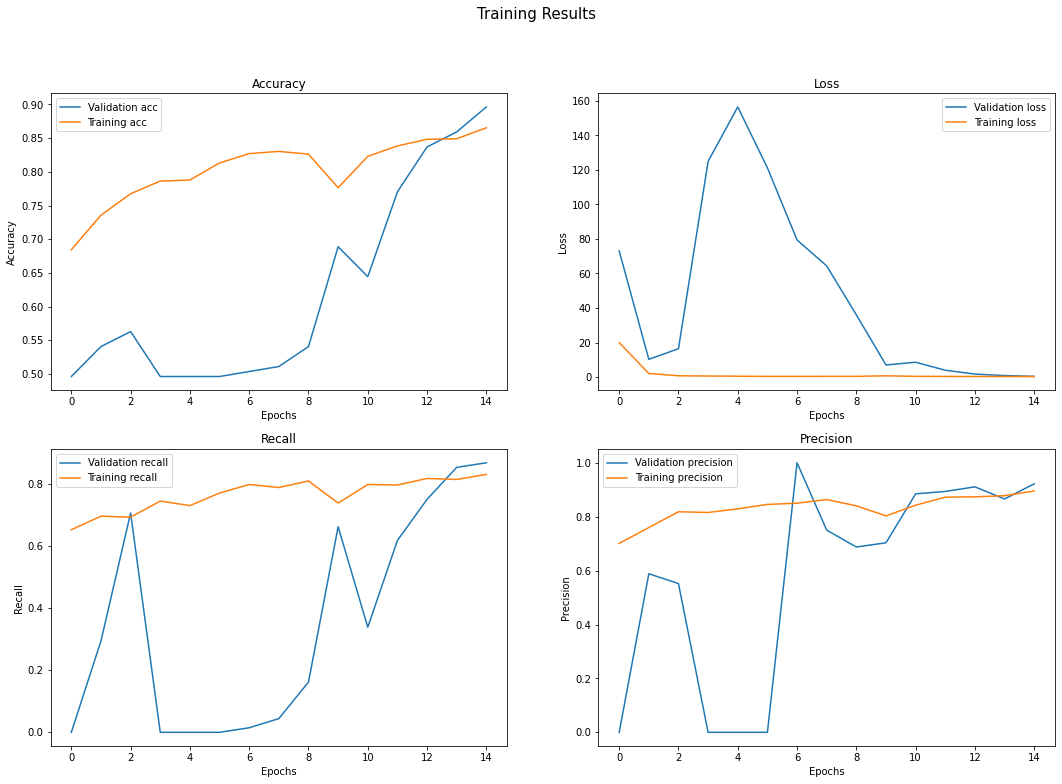

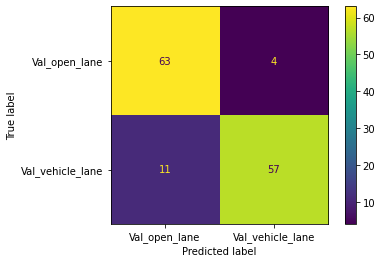

In [31]:
visualize_results(cnn_history_3, cnn_model_3, batchnorm_train_gen, batchnorm_val_gen)

In [32]:
dump(cnn_history_3.history, open('models/cnn_history_3.pkl', 'wb'))

## CNN4: L2 Regularization

Adding l2 regularization to Conv2D layers, reverting to same number of layers as CNN2.

In [33]:
# Get data from directories and scale
l2_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1,
                                    horizontal_flip=True,
                                    rotation_range=20, 
                                    brightness_range=[0.5, 1.5], 
                                    zoom_range=.2)

l2_train_gen = l2_datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
l2_val_gen = l2_datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [34]:
# Instatiate model
cnn_model_4 = models.Sequential()

# Add model layers - Using architecture from Canvas 'CNN from Scratch - Lab' to start
cnn_model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_4.add(MaxPooling2D((2, 2)))
cnn_model_4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_4.add(MaxPooling2D((2, 2)))
cnn_model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_4.add(MaxPooling2D((2, 2)))
cnn_model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_4.add(MaxPooling2D((2, 2)))
# Flatten
cnn_model_4.add(Flatten())
# Final Dense layers
cnn_model_4.add(Dense(512, activation='relu'))
cnn_model_4.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_4.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [ ]:
# Train the model
cnn_history_4 = cnn_model_4.fit(l2_train_gen,
                                epochs=15,
                                validation_data=l2_val_gen)

Epoch 1/15
32/39 [=======================>......] - ETA: 31s - loss: 2.2496 - acc: 0.5729 - recall: 0.6119 - precision: 0.5712

In [ ]:
cnn_model_4.save('models/cnn_model_4.h5')

In [ ]:
visualize_results(cnn_history_4, cnn_model_4, l2_train_gen, l2_val_gen)

In [ ]:
dump(cnn_history_4.history, open('models/cnn_history_4.pkl', 'wb'))